In [561]:
import torch
import matplotlib.pyplot as plt

In [562]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [563]:
weight = 0.3
bias = 0.9
X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * X + bias
X[:5], y[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120]]))

In [564]:
train_split = int(0.8 * len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


In [565]:
def plot_predictions(
    X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_pred=None
):
    plt.scatter(X_train, y_train, label="Train", s=10)
    plt.scatter(X_test, y_test, label="Test", s=10)
    if y_pred is not None:
        plt.scatter(X_test, y_pred, label="Predictions", s=10)

    plt.legend()

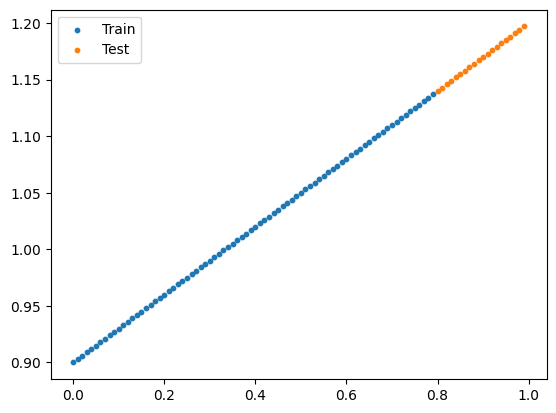

In [566]:
plot_predictions()

In [567]:
from torch import nn
class LinearRegressionModel2(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1,out_features=1)
        
    def forward(self,X:torch.Tensor)-> torch.Tensor:
        return self.linear(X)

In [568]:
torch.manual_seed(42)

model = LinearRegressionModel2()
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]])),
             ('linear.bias', tensor([0.8300]))])

In [569]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.01)

In [570]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [571]:
model.to(device)

LinearRegressionModel2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [572]:
epochs = 300

for epoch in range(epochs + 1):
    model.train()
    
    y_pred = model(X_train)
    
    loss = loss_fn(y_pred,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        model.eval()
        
        with torch.inference_mode():
            y_pred_test = model(X_test)
            loss_test = loss_fn(y_pred_test,y_test)
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {loss_test}")

Epoch: 0 | Train Loss: 0.1275613158941269 | Test Loss: 0.32681992650032043
Epoch: 20 | Train Loss: 0.06593604385852814 | Test Loss: 0.10931289196014404
Epoch: 40 | Train Loss: 0.032058585435152054 | Test Loss: 0.06875057518482208
Epoch: 60 | Train Loss: 0.0019438877934589982 | Test Loss: 0.009274578653275967
Epoch: 80 | Train Loss: 0.0023476802743971348 | Test Loss: 0.005570900626480579
Epoch: 100 | Train Loss: 0.001530835754238069 | Test Loss: 0.0004207015153951943
Epoch: 120 | Train Loss: 0.004162553232163191 | Test Loss: 0.007628608029335737
Epoch: 140 | Train Loss: 0.0036659815814346075 | Test Loss: 0.00671879667788744
Epoch: 160 | Train Loss: 0.0026628770865499973 | Test Loss: 0.0042772176675498486
Epoch: 180 | Train Loss: 0.00026639923453330994 | Test Loss: 0.002645003842189908
Epoch: 200 | Train Loss: 0.0012218088377267122 | Test Loss: 0.002988141728565097
Epoch: 220 | Train Loss: 0.0006344571593217552 | Test Loss: 0.0023452520836144686
Epoch: 240 | Train Loss: 0.002212223364040

In [576]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3003]], device='cuda:0')),
             ('linear.bias', tensor([0.8990], device='cuda:0'))])

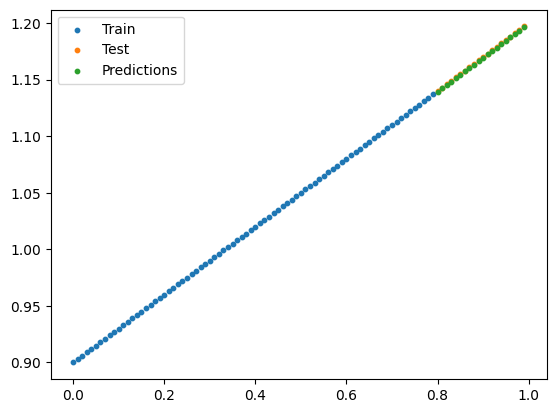

In [573]:
plot_predictions(y_pred=y_pred_test.cpu())

In [574]:
torch.save(obj=model.state_dict(),f="models/exercie-model.pth")

In [575]:
loaded_model = LinearRegressionModel2()

loaded_model.load_state_dict(torch.load("models/exercie-model.pth",weights_only=True))

loaded_model.state_dict()

OrderedDict([('linear.weight', tensor([[0.3003]])),
             ('linear.bias', tensor([0.8990]))])